In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime


In [165]:
def parser(x):
    return datetime.strptime("190"+x, '%Y-%m')
sales = pd.read_csv("shampoo_sales.csv", header=0,parse_dates=True,index_col='Month', date_parser=parser)

In [166]:
sales['Sales of shampoo over a three year period'].dtype

dtype('float64')

In [167]:
sales = sales.dropna()

In [168]:
sales = sales.values
sales

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [170]:
# sales.plot()

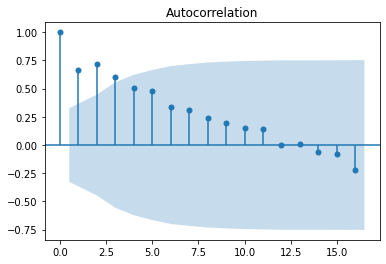

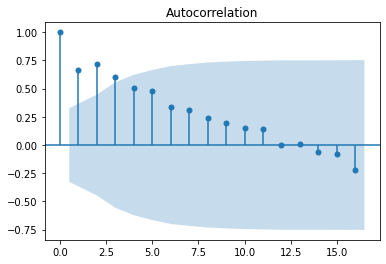

In [139]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

In [172]:
# sales = sales.shift(1)

In [141]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [142]:
sales_diff = sales_diff[1:]
# sales_diff

In [143]:
sales_diff = sales_diff[1:]
sales_diffcolumns

,Sales of shampoo over a three year period
Month,
1901-03-01,-120.1
1901-04-01,37.2
1901-05-01,-63.8
1901-06-01,61.0
1901-07-01,-11.8
1901-08-01,63.3
1901-09-01,-7.3
1901-10-01,-31.7
1901-11-01,-69.9


In [151]:
print(sales_diff.dtypes)

Sales of shampoo over a three year period    float64
dtype: object


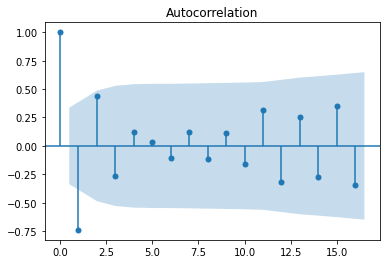

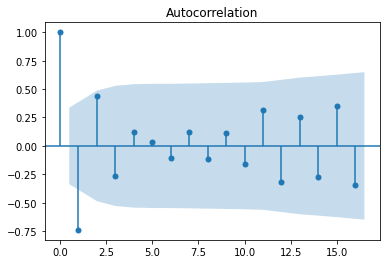

In [144]:
plot_acf(sales_diff)

<AxesSubplot:xlabel='Month'>

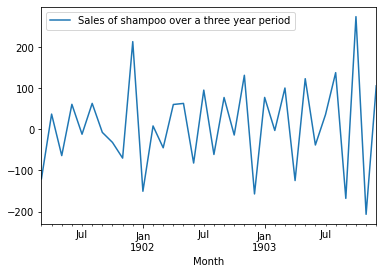

In [145]:
sales_diff.plot()

In [173]:
# prepare training dataset
train_size = int(len(sales)*0.66)
train, test = sales[0:train_size], sales[train_size:len(sales)]

In [175]:
print(train.size)
print(test.size)


23
13


In [193]:
from statsmodels.tsa.arima_model import ARIMA
import warnings

warnings.filterwarnings('ignore')

#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model

history = [x for x in train]
predictions = []

for t in range(len(test)):
    model = ARIMA(history,order=(8,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('RMSE: %.3f' % rmse)


>Predicted=378.509, Expected=342.300
>Predicted=330.356, Expected=339.700
>Predicted=412.932, Expected=440.400
>Predicted=364.436, Expected=315.900
>Predicted=402.659, Expected=439.300
>Predicted=361.304, Expected=401.300
>Predicted=429.372, Expected=437.400
>Predicted=395.514, Expected=575.500
>Predicted=448.941, Expected=407.600
>Predicted=515.312, Expected=682.000
>Predicted=433.439, Expected=475.300
>Predicted=684.605, Expected=581.300
>Predicted=586.009, Expected=646.900
RMSE: 132.783


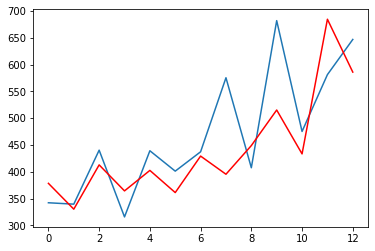

In [195]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()